In [12]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time


#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap

import seaborn as sns
plt.style.use('seaborn-whitegrid')


from IPython.core.display import HTML

from IPython.display import clear_output


# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


%matplotlib inline  



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Scenario,Model,Valid_BalAcc,Valid_Sens,Valid_Spec
5,Single-Model,k-NN,0.74,0.85,0.62
5,Ensemble-Imbalance,k-NN,0.83,0.85,0.82
4,Single-Model,SVM,0.85,0.89,0.82
4,Ensemble-Imbalance,SVM,0.86,0.91,0.80
3,Single-Model,Random Forest,0.79,0.64,0.95
3,Ensemble-Imbalance,Random Forest,0.87,0.91,0.83
2,Single-Model,Neural Networks,0.86,0.83,0.89
2,Ensemble-Imbalance,Neural Networks,0.87,0.94,0.80
1,Single-Model,Naïve Bayes,0.80,0.83,0.75
1,Ensemble-Imbalance,Naïve Bayes,0.82,0.87,0.77


\begin{tabular}{llrrr}
\toprule
          Scenario &           Model &  Valid\_BalAcc &  Valid\_Sens &  Valid\_Spec \\
\midrule
      Single-Model &            k-NN &          0.74 &        0.85 &        0.62 \\
Ensemble-Imbalance &            k-NN &          0.83 &        0.85 &        0.82 \\
      Single-Model &             SVM &          0.85 &        0.89 &        0.82 \\
Ensemble-Imbalance &             SVM &          0.86 &        0.91 &        0.80 \\
      Single-Model &   Random Forest &          0.79 &        0.64 &        0.95 \\
Ensemble-Imbalance &   Random Forest &          0.87 &        0.91 &        0.83 \\
      Single-Model & Neural Networks &          0.86 &        0.83 &        0.89 \\
Ensemble-Imbalance & Neural Networks &          0.87 &        0.94 &        0.80 \\
      Single-Model &     Naïve Bayes &          0.80 &        0.83 &        0.75 \\
Ensemble-Imbalance &     Naïve Bayes &          0.82 &        0.87 &        0.77 \\
      Single-Model &   Decision 

,Scenario,Model,Valid_BalAcc,Valid_Sens,Valid_Spec
5,Single-Model,k-NN,0.74,0.84,0.63
5,Ensemble-Imbalance,k-NN,0.83,0.85,0.82
4,Single-Model,SVM,0.85,0.89,0.81
4,Ensemble-Imbalance,SVM,0.88,0.92,0.83
3,Single-Model,Random Forest,0.79,0.64,0.95
3,Ensemble-Imbalance,Random Forest,0.88,0.91,0.83
2,Single-Model,Neural Networks,0.86,0.83,0.89
2,Ensemble-Imbalance,Neural Networks,0.88,0.94,0.82
1,Single-Model,Naïve Bayes,0.80,0.83,0.75
1,Ensemble-Imbalance,Naïve Bayes,0.82,0.87,0.77


\begin{tabular}{llrrr}
\toprule
          Scenario &           Model &  Valid\_BalAcc &  Valid\_Sens &  Valid\_Spec \\
\midrule
      Single-Model &            k-NN &          0.74 &        0.84 &        0.63 \\
Ensemble-Imbalance &            k-NN &          0.83 &        0.85 &        0.82 \\
      Single-Model &             SVM &          0.85 &        0.89 &        0.81 \\
Ensemble-Imbalance &             SVM &          0.88 &        0.92 &        0.83 \\
      Single-Model &   Random Forest &          0.79 &        0.64 &        0.95 \\
Ensemble-Imbalance &   Random Forest &          0.88 &        0.91 &        0.83 \\
      Single-Model & Neural Networks &          0.86 &        0.83 &        0.89 \\
Ensemble-Imbalance & Neural Networks &          0.88 &        0.94 &        0.82 \\
      Single-Model &     Naïve Bayes &          0.80 &        0.83 &        0.75 \\
Ensemble-Imbalance &     Naïve Bayes &          0.82 &        0.87 &        0.77 \\
      Single-Model &   Decision 

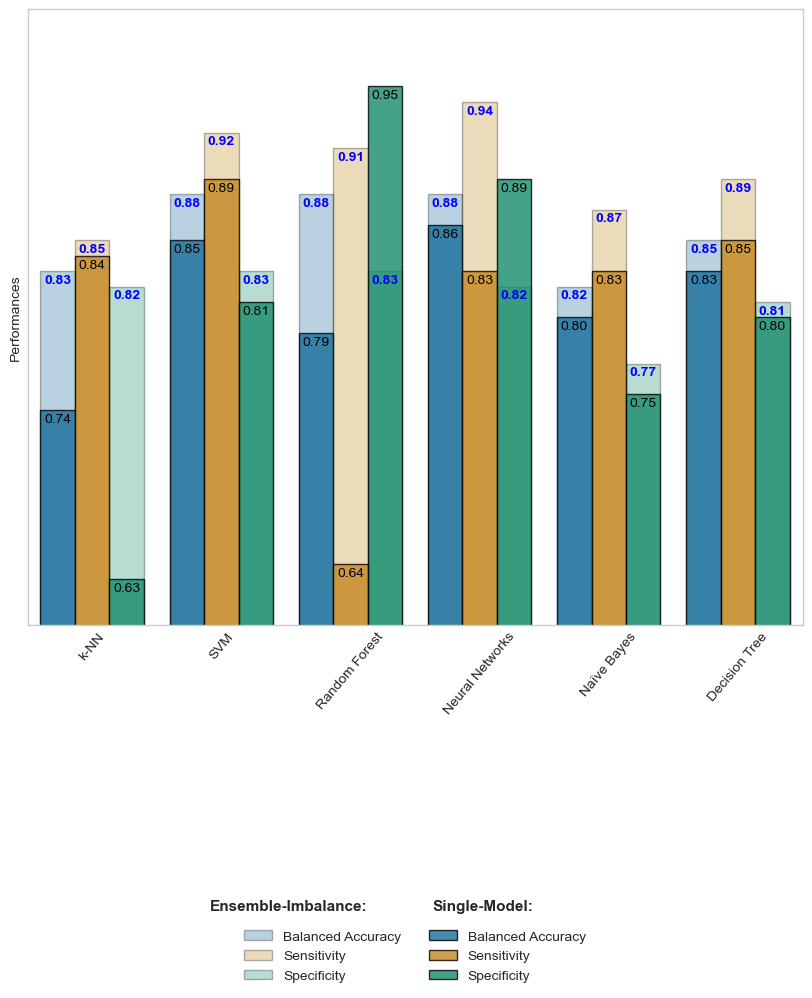

In [48]:
df = utils.read_csv(csv_file='exec_results/validation_results.csv')

cols_of_interest = [
    'Scenario',
    'Model',
    'Valid_BalAcc',
    'Valid_Sens',
    'Valid_Spec',
]

df_single = df.loc[(df.Scenario=='Single-Model')].copy()
# df_single['Scenario_Model'] = df_single.Model
df_single = df_single[cols_of_interest]
df_single.sort_values(by=cols_of_interest, ascending=False, inplace=True)

df_ensimb = df.loc[(df.Scenario=='Ensemble-Imbalance')].copy()
df_ensimb['Model'] = df_ensimb.Estimator #.apply(lambda x: f'*{x}')
df_ensimb = df_ensimb[cols_of_interest]
df_ensimb.sort_values(by=cols_of_interest, ascending=False, inplace=True)

df_single = df_single.groupby(by=['Scenario', 'Model']).first().reset_index()
df_ensimb = df_ensimb.groupby(by=['Scenario', 'Model']).first().reset_index()


# display(df_single.head(50))
# display(df_ensimb.head(50))

df_all_models = pd.concat([df_single, df_ensimb])
df_all_models.Model = df_all_models.Model.apply(lambda x: utils_exec_models.get_model_description(x))


df_all_models.sort_values(
    by=[
#         'Valid_BalAcc',
#         'Valid_Sens',
#         'Valid_Spec',
        'Model', 
        'Scenario', 
    ], 
    ascending=False, 
    inplace=True
)    


display(df_all_models)

# df_plot = df_all_models.sort_values(by=['Scenario'], ascending=True)
# df_plot



print(df_all_models.to_latex(
    index=False,
#         formatters={"name": str.upper},
    float_format="{:.2f}".format,
))  

# ================================================
# ================================================
# ================================================

# data_aux = df_plot.sort_values(by=['Bal. Acc.', 'Sens.', 'Scenario'], ascending=False) 
data_aux = df_all_models.copy() #.sort_values(by=['Model', 'Bal. Acc.', 'Sens.'], ascending=False) 


scenarios = ['Ensemble-Imbalance', 'Single-Model']

i = 0

plt.figure(figsize=[10,8])


# for scenario, metric, desc in zip(scenarios, metrics, descs):
for scenario in scenarios:
    i += 1

    data = data_aux.loc[(data_aux.Scenario == scenario)].copy()
#     data.drop(columns=['Scenario'], inplace=True)
    
    data = data.melt(
        id_vars=['Scenario', 'Model'], 
        var_name='Metric', 
        value_name='Value'
    )
    
    data.Metric.replace('Valid_BalAcc', 'Balanced Accuracy', inplace=True)
    data.Metric.replace('Valid_Sens', 'Sensitivity', inplace=True)
    data.Metric.replace('Valid_Spec', 'Specificity', inplace=True)
    
#     display(data)
    
    if scenario == 'Ensemble-Imbalance':
#         palette=['silver' for x in data.Value]
        palette = 'colorblind'
        color = None
        fill = False
        edgecolor='black', 
        linewidth=2,
        alpha = 0.3
    else:
        palette = 'colorblind'
        color = None
        fill = True
        edgecolor='black', 
        linewidth=1,
        alpha = 0.8
    
    
    g = sns.barplot(
        data=data, 
        x='Model', 
        y='Value', 
        hue='Metric',
        palette=palette,
        edgecolor=edgecolor, 
        alpha=alpha,
#         color=color,
#         fill=fill,
#         linewidth=linewidth,
#         legend=False,
    )            
   
    

midline_decimal_point = False

# annotate the bars with their values
for idx_p, p in enumerate(g.axes.patches):
    
    
    font_bold = False
    font_size = 10
    mark = ''
    offset_aux = 0
    offset_mark = 0.015
    ypos_offset = 0.006

    
    
    if idx_p <= 17: #'Ensemble-Imbalance':
        mark_aux = '' #'$\star$'
        max_bacc = 0.88
        max_sens = 0.94
        max_spec = 0.83
        offset = offset_aux
        annot_ypos_offset = (-1) * ypos_offset
        hatch = ''
        
    else: #'Single-Model':
        mark_aux = '' #'$\diamond$'
        max_bacc = 0.85
        max_sens = 0.91
        max_spec = 0.95
        offset   = offset_aux
        annot_ypos_offset = (-1) * ypos_offset
        hatch = '.'

#     hatches = ['-', '+', 'x', '\\', '*', 'o']

#     p.set_hatch(hatch)

        
#     # MARK THE maximum Bal. Acc.
#     if ( idx_p <= 5 and p.get_height() == max_bacc):
#         font_bold = True
#         font_size = 9
# #         offset = offset_mark
#         mark = mark_aux
#     # MARK THE maximum Sens.
#     if ( (6 <= idx_p <= 11) and p.get_height() == max_sens):
#         font_bold = True
#         font_size = 9
# #         offset = offset_mark
#         mark = mark_aux
#     # MARK THE maximum Spec.
#     if ( idx_p >= 12 and p.get_height() == max_spec):
#         font_bold = True
#         font_size = 9
# #         offset = offset_mark
#         mark = mark_aux


    # REPLACE "DECIMAL POINT" TO "MIDLINE DECIMAL POINT"
    val = f'{mark}{p.get_height():.2f}'
    if midline_decimal_point:
        val = val.replace('.', '·')
    
    
    g.annotate(
        val,
        xy=(
            (p.get_x()+p.get_width()/2) - offset,
            p.get_height() + annot_ypos_offset
        ),
        ha="center", 
        va="center",
        size=font_size,
        color=('blue' if (idx_p <= 17) else 'black'),
        weight=('bold' if (idx_p <= 17) else 'normal'),
    )    


sns.move_legend(g.axes, "lower center", bbox_to_anchor=(0.5, -0.6), ncol=2)
g.legend_.set_title(None)


# plt.title( 
#     ('Ensemble-Imbalance vs. Single-Model'),
#     fontsize=12
# )

plt.ylim(0.6, 1.0)
plt.yticks([.6, .7, .8, .9, 1.])
plt.yticks([])
plt.xticks(rotation=50)
plt.yticks(fontsize=8)

plt.xlabel('')
plt.ylabel('Performances')
    
    
g.annotate(
    'Ensemble-Imbalance:', xy=(151, 63), xycoords='figure points', size=11, weight='bold'
)    
g.annotate(
    'Single-Model:', xy=(311, 63), xycoords='figure points', size=11, weight='bold'
)    


# # plt.savefig(
# #     f'saved_graphs/performances_both_scenarios.png', 
# #     bbox_inches='tight', 
# # #         pad_inches=2,
# #     dpi=300
# # )

# utils.save_plot(
#     plt=plt, 
#     folder='saved_graphs', 
#     file_name='performances_both_scenarios', 
#     save_in_pdf_format=True,
# )


plt.show()



---
---
---

# OTHERS